# Using Scikit Learn and Python

In [1]:
#Generation of artificial data wih scikit learn and using it in KMeans clustering
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
from sklearn.datasets import make_blobs
data= make_blobs(n_samples=200, n_features=2, centers=4, cluster_std = 1.8, random_state= 101)

In [48]:
print (type(data))
print (type(data[0]))
print (type(data[1]))
print (data[0].shape) # 200 data points with 2 features with 4 blobs
print (data[1].shape) # data points center (of 2 blobs with 4 clusters and centers 0,1,2 and 3)
#increase cluster standard deviation to make it hard to distinguish clusters

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 2)
(200,)


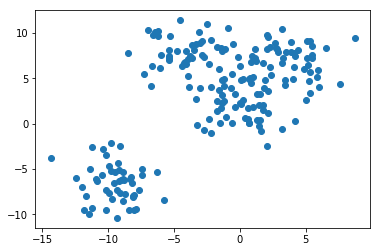

In [49]:
#data visualization
plt.scatter(data[0][:,0], data[0][:,1])

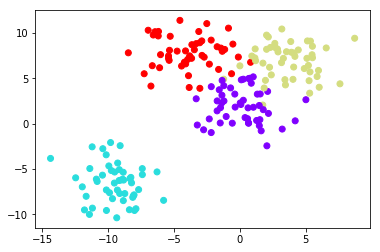

In [50]:
#data visualization
plt.scatter(data[0][:,0], data[0][:,1], c=data[1],cmap='rainbow') #1 cluster is distinguished , 3 are little noisy between each other

In [51]:
from sklearn.cluster import KMeans #KMeans is unsupervised learning algorithm
#Starts off by randomly assigning each observation to a cluster, finds centroid of each cluster. Then it iterates through 2 steps
# repeats until cluster variation cant be reduced any further
#Step1: Reassigns data point to cluster whose centroid is closest to the point.
#Step2: calculates the new centroid for each cluster
kmeans= KMeans(n_clusters=4)
kmeans.fit(data[0])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

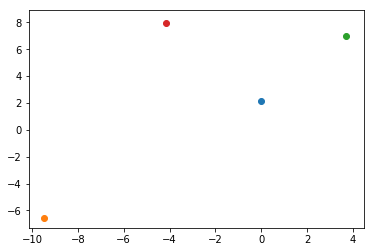

In [90]:
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1])
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1])
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1])
plt.scatter(kmeans.cluster_centers_[3][0], kmeans.cluster_centers_[3][1])

In [111]:
kmeans.labels_ #predicted labels of data belonging to 4 clusters

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

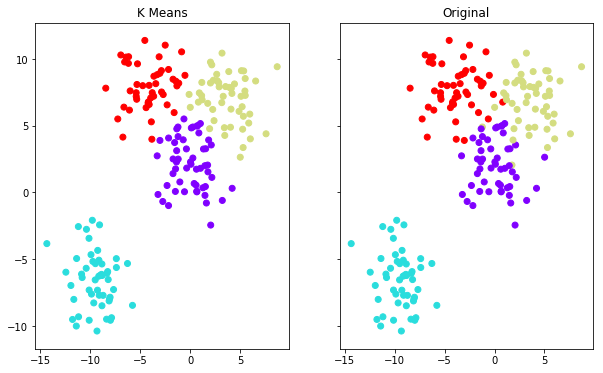

In [113]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey= True, figsize= (10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c= kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c= data[1], cmap='rainbow')
#Created a subplot (1 row by 2 columns , 2 plots which share axes of figsize(10,6)). used Tuple unpacking to grab 2 sets of axes. 
#First set of axes plots original data, coloured by algorithm found labels, other set of axes plots the original data coloured 
#by correct cluster labels from blob creation we used.


In [119]:
kmeans1= KMeans(n_clusters=2)
kmeans1.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

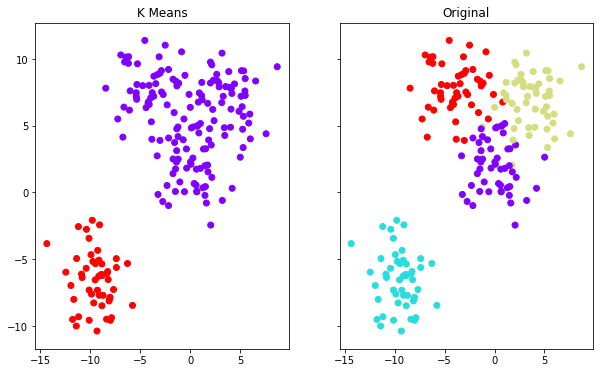

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey= True, figsize= (10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c= kmeans1.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c= data[1], cmap='rainbow')

In [130]:
#within cluster sum of squares is also known as inertia, intertia computed by model is given by inertia_ attribute provided
#by sklearn. Elbow method can help us choose the number of clusters for compeletely new data. 

wcss = []
for i in range(1, 21):
    kmeans_test = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10)
    kmeans_test.fit(data[0])
    wcss.append(kmeans_test.inertia_)

Text(0.5,1,'Elbow method to determine ideal number of clusters')

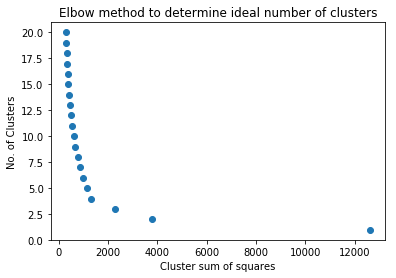

In [134]:
plt.scatter(wcss,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Cluster sum of squares')
plt.ylabel('No. of Clusters')
plt.title('Elbow method to determine ideal number of clusters')
#Beyond cluster number 4 we see that the css does not decrease much. so 4 is the ideal no. of clusters